# Modelos lineales y regularizacion

In [43]:
import numpy as np

n=100
X = 2 * np.random.rand(n, 1)
y = 4 + 3 * X + np.random.randn(n, 1)

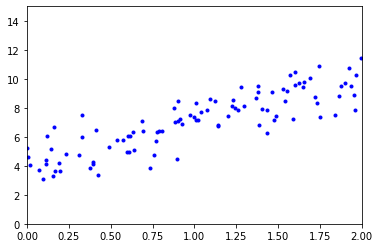

In [44]:
import matplotlib.pyplot as plt

plt.plot(X,y,'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [45]:
X_b = np.c_[np.ones((n, 1)), X] # add x0 = 1 to each instance
# w_hat 
w_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [46]:
X_b.shape

(100, 2)

In [47]:
print(w_hat)

[[4.06304865]
 [2.99011264]]


In [48]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(w_hat)

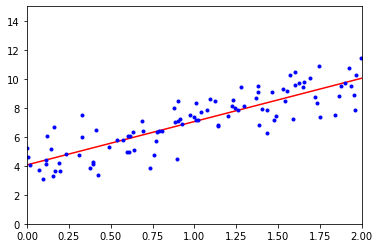

In [49]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)
print('Coeficientes Manual : ',w_hat)

Coeficientes Sklearn :  [4.06304865] [[2.99011264]]
Coeficientes Manual :  [[4.06304865]
 [2.99011264]]


# Regularizacion

In [79]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * np.sin(X) + np.random.randn(100, 1)

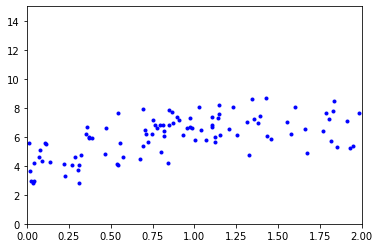

In [80]:
import matplotlib.pyplot as plt

plt.plot(X,y,'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [81]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)

In [82]:
X_p[0]

array([1.        , 0.30911853, 0.09555426])

In [83]:
X[0]**2

array([0.09555426])

In [84]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
r2=lin_reg.score(X, y)
print('Coeficiente Determinacion :',r2)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)

Coeficiente Determinacion : 0.3433146910878038
Coeficientes Sklearn :  [4.69999586] [[1.49790251]]


In [85]:
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)
print('Coeficiente Determinacion :',r2)

Coeficientes Sklearn :  [3.73141019] [[ 0.          4.57292992 -1.62042343]]
Coeficiente Determinacion : 0.4766724518623764


In [86]:
y_predict=lin_reg.predict(X_p)

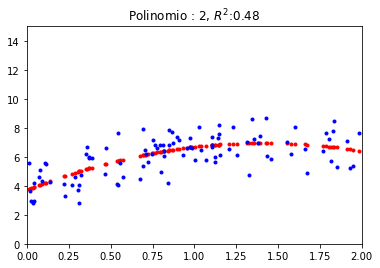

In [87]:
plt.plot(X_p[:,1], y_predict, "r.")
plt.plot(X,y,'b.')
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(2,r2))
plt.axis([0, 2, 0, 15])
plt.show()

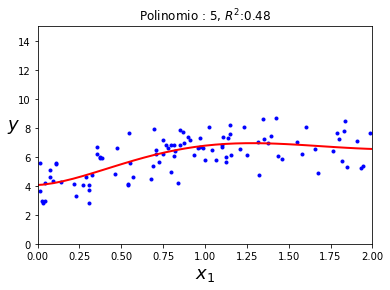

In [89]:
K=5
poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(K,r2))
plt.show()

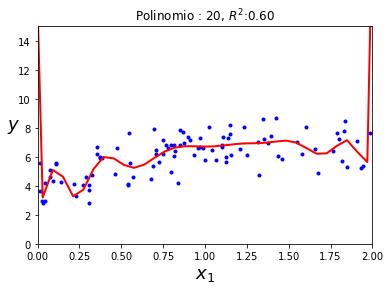

In [90]:
K=20
poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(K,r2))
plt.show()

In [91]:
print(X_p.shape)

(100, 21)


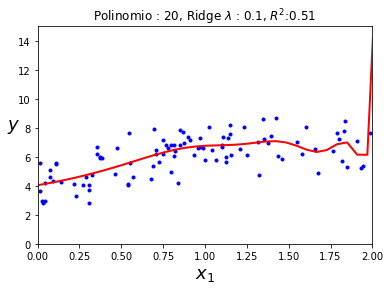

In [97]:
from sklearn.linear_model import Ridge

lamb=0.1
K=20

poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)

ridge_reg = Ridge(alpha=lamb, solver="cholesky", random_state=42)
ridge_reg.fit(X_p, y)
r2=ridge_reg.score(X_p, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = ridge_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, Ridge $\lambda$ : {1}, $R^2$:{2:0.2f}'.
          format(K,lamb,r2))
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.12600496310996, tolerance: 0.01959599125636554
  positive)


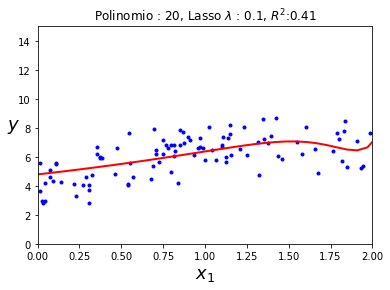

In [98]:
from sklearn.linear_model import Lasso

lamb=0.1
K=20

poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_p, y)
r2=lasso_reg.score(X_p, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lasso_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, Lasso $\lambda$ : {1}, $R^2$:{2:0.2f}'.
          format(K,lamb,r2))
plt.show()

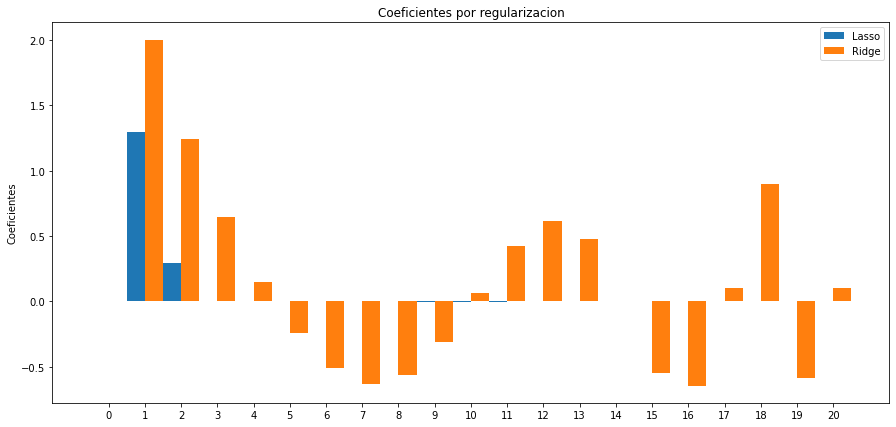

In [101]:
x = np.arange(len(lasso_reg.coef_))  # the label locations
width = 0.5  # the width of the bars
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, lasso_reg.coef_, width, label='Lasso')
rects2 = ax.bar(x + width/2, ridge_reg.coef_[0], width, label='Ridge')
#rects3 = ax.bar(x + width/2, lin_reg.coef_[0], width, label='Linear')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes por regularizacion')
ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.legend()

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo base para predecir el total de 'casos por millon de habitantes' a partir de las caracteristicas del pais (edad de la problacion, ingreso per capita, etc).
2. Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo regularizacion.


In [102]:
import pandas as pd

pcr_test=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [103]:
pcr_test.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

In [12]:
pcr_test.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [105]:
pcr_test['date']=pd.to_datetime(pcr_test['date'],format='%Y/%m/%d')
pcr_test['location'] = pcr_test['location'].astype('category')
pcr_test['continent'] = pcr_test['continent'].astype('category')
pcr_test['iso_code'] = pcr_test['iso_code'].astype('category')

In [118]:
df_group=pcr_test.groupby(['location'],observed=True).max()

In [119]:
df_group.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2020-07-18,35289.0,1063.0,1147.0,56.0,906.512,27.307,29.464,1.439,NaN,NaN,NaN,NaN,NaN,NaN,84.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83
Albania,2020-07-18,3906.0,117.0,107.0,4.0,1357.287,40.656,37.181,1.390,NaN,NaN,NaN,NaN,NaN,NaN,89.81,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
Algeria,2020-07-18,21948.0,904.0,1057.0,42.0,500.513,20.615,24.104,0.958,NaN,NaN,NaN,NaN,NaN,NaN,92.13,43851043.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88
Andorra,2020-07-18,880.0,79.0,52.0,4.0,11389.374,1022.455,673.008,51.770,NaN,NaN,NaN,NaN,NaN,NaN,56.48,77265.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73
Angola,2020-07-18,638.0,62.0,29.0,2.0,19.412,1.886,0.882,0.061,NaN,NaN,NaN,NaN,NaN,NaN,90.74,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15


In [153]:
y=df_group['total_cases_per_million']

In [155]:
y[y.isna()]=y.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
y.isna().sum()

0

In [148]:
cols=['stringency_index',
            'median_age',
            'aged_65_older','aged_70_older','gdp_per_capita',
            'extreme_poverty','cvd_death_rate','diabetes_prevalence',
            'female_smokers','male_smokers','handwashing_facilities',
            'hospital_beds_per_thousand','life_expectancy']

In [149]:
X=df_group[[x for x in cols]].fillna(method='ffill').fillna(method='bfill')

In [158]:
X.isna().sum()

stringency_index              0
median_age                    0
aged_65_older                 0
aged_70_older                 0
gdp_per_capita                0
extreme_poverty               0
cvd_death_rate                0
diabetes_prevalence           0
female_smokers                0
male_smokers                  0
handwashing_facilities        0
hospital_beds_per_thousand    0
life_expectancy               0
dtype: int64

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lin_reg = LinearRegression(normalize=False,fit_intercept=True).fit(X_train, y_train)
y_hat=lin_reg.predict(X_test)
print('Coeficiente de Determinacion R2  : {0:0.2f}'.format(lin_reg.score(X_test,y_test)))
print('MAE : {0:0.2f}'.format(mean_absolute_error(y_test,y_hat)))
print('% Varianza Explicada  : {0:0.2f}'.format(explained_variance_score(y_test,y_hat)))
print('-----------------------------------------------------')



Coeficiente de Determinacion R2  : -0.74
MAE : 2353.71
% Varianza Explicada  : -0.72
-----------------------------------------------------
